1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pickle

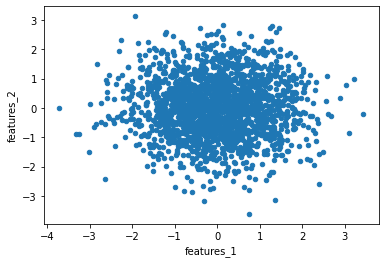

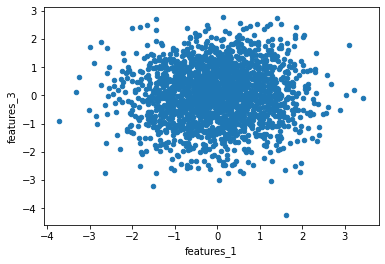

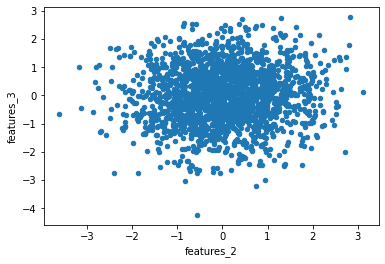

In [30]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/

df = pd.read_csv("data/regression_generated.csv")
features = ["features_1","features_2","features_3"]
%matplotlib inline
for i in range(3): 
    for j in range(i,3):
        if i != j:
            df.plot.scatter(features[i],features[j]) # normal 2D distribution



2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

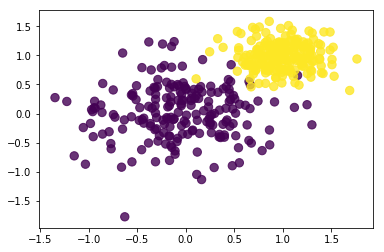

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

<AxesSubplot:xlabel='x', ylabel='y'>

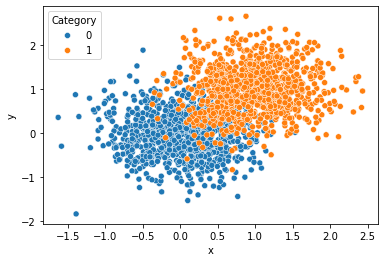

In [31]:
def my_func(mean=[0,1], std=[0.5,0.5], size=1000):
    cat1 = np.random.normal(mean[0], std[0], size=(size,2))
    cat2 = np.random.normal(mean[1], std[1], size=(size,2))
    df1 = pd.DataFrame(cat1, columns=['x', 'y'])
    df2 = pd.DataFrame(cat2, columns=['x', 'y'])
    df1['Category'] = 0
    df2['Category'] = 1
    df = pd.concat([df1, df2])
    return df

df = my_func()

sns.scatterplot(data=df, x='x', y='y', hue = 'Category')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


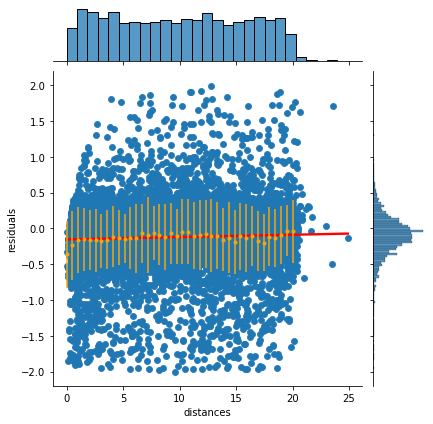

In [214]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
infile = open("data/residuals_261.pkl", 'rb')
residuals = pickle.load(infile)

dat = pd.DataFrame(residuals.item())
dat = dat[abs(dat['residuals']) < 2]
print(dat)
g = sns.jointplot(x='distances', y='residuals', data=dat)
sns.regplot(x=dat['distances'].to_numpy(), y=dat['residuals'].to_numpy(), data=dat, line_kws={"color": "red"} ) # this seems to be necessary because kind='reg' in jointplot doesn't work with these versions

#dat[dat['distances'].max()
nbin = 40
#dat['distances'].hist(bins=nbin)
max = 20
f = max/(nbin*2)
x = np.linspace(0,max,nbin)
y = [dat["residuals"][(dat["distances"] <= i+f) & (dat["distances"] >= i-f)].mean() for i in x]
erry = [dat["residuals"][(dat["distances"] <= i+f) & (dat["distances"] >= i-f)].std() for i in x]
plt.errorbar(x=x, y=y, yerr=erry, fmt = ".", color = 'orange')
plt.show()

<AxesSubplot:>

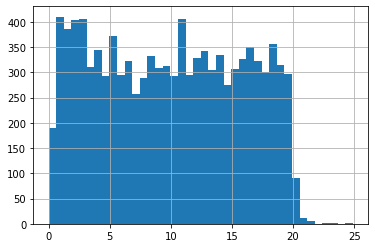

In [218]:
nbin = 40
dat['distances'].hist(bins=nbin)

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [54]:
import scipy
import scipy.stats as stats

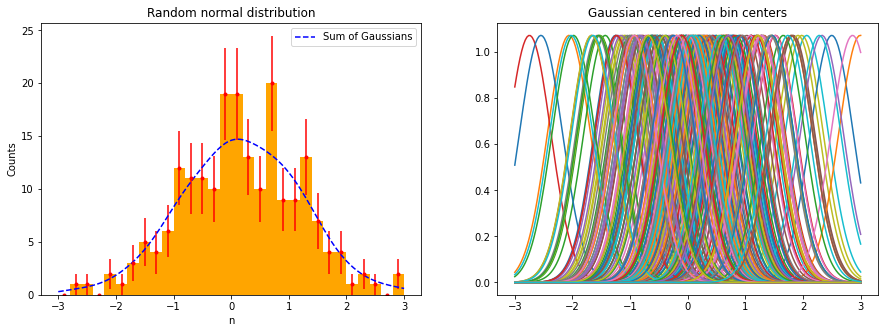

In [153]:
np.random.seed(20398)
x = np.random.normal(0, 1, 200) # mean, std, number

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
entries, edges, _  = ax1.hist(x,30,(-3,3), color='orange') # data, bin, range
bin_center = (edges[:-1] + edges[1:]) / 2
bin_width = edges[1] - edges[0]

ax1.set_ylabel("Counts")
ax1.set_xlabel("n")
ax1.set_title("Random normal distribution")

ax1.errorbar(bin_center, entries, yerr=np.sqrt(entries), fmt='r.')

std_dev = 1.06*x.std()*len(x)**(-1/5)
gauss = np.zeros(200)
x1 = np.linspace(-3,3,200)

ax2.set_title("Gaussian centered in bin centers")
for i in range(0, len(x)):
    ax2.plot(x1, stats.norm.pdf(x1, x[i], std_dev))
    gauss = gauss + stats.norm.pdf(x1, x[i], std_dev)

integral_histogram = scipy.integrate.trapz(entries, bin_center)
integral_gaussians = scipy.integrate.trapz(gauss, x1)

re_norm = (integral_histogram/integral_gaussians)*gauss
norm1 = scipy.integrate.trapz(re_norm, x1) #this is equal to the histogram integral

# Superimpose the normalized sum of all Gaussians onto the original histogram
ax1.plot(x1, re_norm , label='Sum of Gaussians', linestyle='--', color='blue')
ax1.legend()

#print("Integral of Histogram:", integral_histogram)
#print("Integral of Sum of Gaussians renormalized:", norm1)

plt.show()